In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
#Reading the data from source

In [113]:
#D:\SampleSuperstore - SampleSuperstore.csv

In [114]:
retaildata = pd.read_csv('D:\SampleSuperstore - SampleSuperstore.csv')

In [115]:
retaildata

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [116]:
#Exploring the details about dataset

In [117]:
retaildata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [118]:
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [119]:
retaildata.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [120]:
retaildata['Ship Mode'].unique().shape

(4,)

In [121]:
for i in retaildata.columns:
    print('Number of unique categories in', i + 'is',retaildata[i].unique())

Number of unique categories in Ship Modeis ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Number of unique categories in Segmentis ['Consumer' 'Corporate' 'Home Office']
Number of unique categories in Countryis ['United States']
Number of unique categories in Cityis ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas

In [122]:
#checking for outliers

<AxesSubplot:>

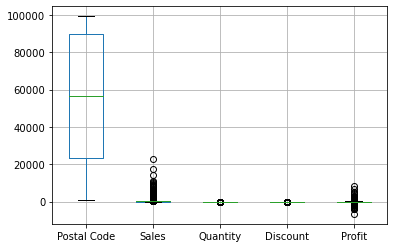

In [123]:
retaildata.boxplot()

In [124]:
#Ship Mode and it's Impact on Sales

In [125]:
#Shipmodewise Total Sales

In [126]:
x = retaildata['Ship Mode'].unique()
x.sort()
x

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [127]:
y = retaildata.groupby(['Ship Mode'])['Sales'].sum()
y

Ship Mode
First Class       3.514284e+05
Same Day          1.283631e+05
Second Class      4.591936e+05
Standard Class    1.358216e+06
Name: Sales, dtype: float64

In [128]:
#Shipmodewise Total Profit

In [129]:
ypro = retaildata.groupby(['Ship Mode'])['Profit'].sum()
ypro

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

In [130]:
#Shipmodewise Total Discount

In [131]:
ydisc = retaildata.groupby(['Ship Mode'])['Discount'].sum()
ydisc

Ship Mode
First Class       253.17
Same Day           82.75
Second Class      270.15
Standard Class    955.02
Name: Discount, dtype: float64

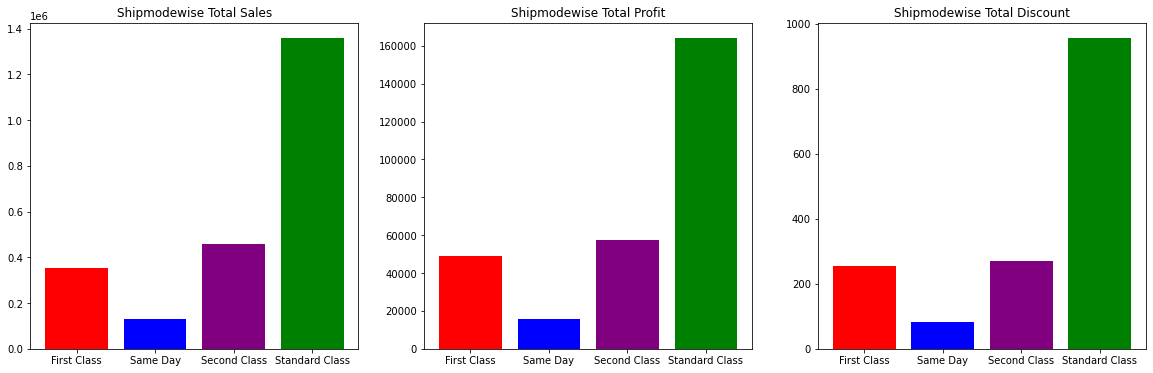

In [132]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
ax1.bar(x,y,color=['red', 'blue', 'purple', 'green'])
ax2.bar(x,ypro,color=['red', 'blue', 'purple', 'green'])
ax3.bar(x,ydisc,color=['red', 'blue', 'purple', 'green'])
ax1.set_title('Shipmodewise Total Sales')
ax2.set_title('Shipmodewise Total Profit')
ax3.set_title('Shipmodewise Total Discount')
plt.show()

In [133]:
#Conclusion=1)The Graph shows that Sales for the ship mode of standard class is having more Sales as Compared to others
#2)We got more profit in Standard Class ship mode.So we have to use this strategis to improve our Sales and Profit

In [134]:
x = retaildata['Ship Mode'].unique()
x.sort()
x

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [135]:
#Shipmodewise Avg Sales

In [136]:
y = retaildata.groupby(['Ship Mode']).agg({'Sales':np.average})
y = y.iloc[:,-1]
y

Ship Mode
First Class       228.497024
Same Day          236.396179
Second Class      236.089239
Standard Class    227.583067
Name: Sales, dtype: float64

In [137]:
#Shipmodewise Avg Profit

In [138]:
yprof = retaildata.groupby(['Ship Mode']).agg({'Profit':np.average})
yprof = yprof.iloc[:,-1]
yprof

Ship Mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: Profit, dtype: float64

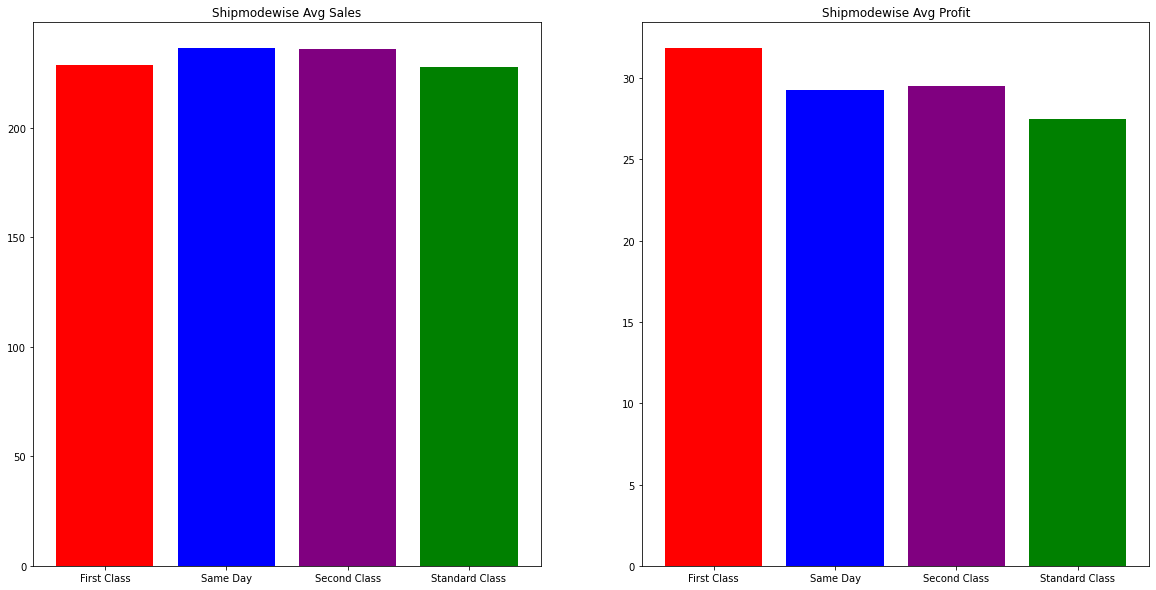

In [139]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.bar(x,y,color=['red', 'blue', 'purple', 'green'])
ax2.bar(x,yprof,color=['red', 'blue', 'purple', 'green'])
ax1.set_title('Shipmodewise Avg Sales')
ax2.set_title('Shipmodewise Avg Profit')
plt.show()

In [140]:
#Conclusion:1)The Graph shows that average Sales & Avg Profit for the ship mode of standard class is having less avg Sales & avg profit as compared to others
#2)We have to think about this mode and we have to think how we can improve our average sales and profit is standard class

#SegmentWise Sales and it's Impact



In [141]:
#SegmentWise Total sales

In [142]:
x1 = retaildata['Segment'].unique()
x1

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [143]:
y1 = retaildata.groupby(['Segment'])['Sales'].sum()
y1

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

In [144]:
#SegmentWise Total Profit

In [145]:
y1pro = retaildata.groupby(['Segment'])['Profit'].sum()
y1pro

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [146]:
#SegmentWise Total Discount

In [147]:
y1disc = retaildata.groupby(['Segment'])['Discount'].sum()
y1disc

Segment
Consumer       820.91
Corporate      477.85
Home Office    262.33
Name: Discount, dtype: float64

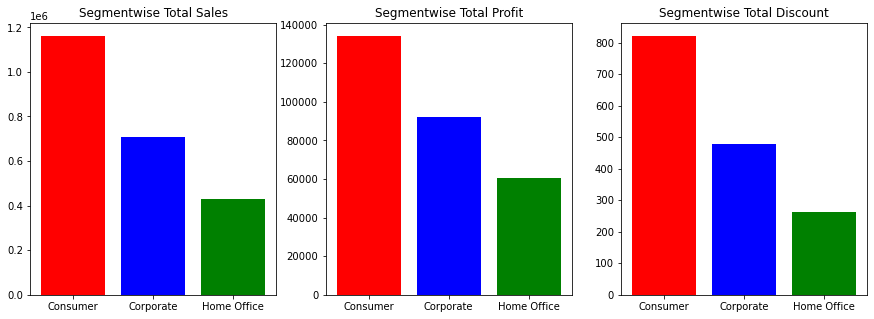

In [80]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.bar(x1,y1,color=['red','blue','green'])
ax2.bar(x1,y1pro,color=['red','blue','green'])
ax3.bar(x1,y1disc,color=['red','blue','green'])
ax1.set_title('Segmentwise Total Sales')
ax2.set_title('Segmentwise Total Profit')
ax3.set_title('Segmentwise Total Discount')
plt.show()

In [81]:
#Conculusion 1)From the above graphs we can say that the Consumer segment performance is very good and also for Coorporate Segment
#2)As we can see here the consumer segment is performing very good because we gave discount on that products
#3)so we have to give some discpunt on Coorporte and home office segment products also we can increase the profit and sales


In [82]:
#SegmentWise Average Sales


In [83]:
x1 = retaildata['Segment'].unique()
x1

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [84]:
y1 = retaildata.groupby(['Segment']).agg({'Sales':np.average})
y1

,Sales
Segment,
Consumer,223.733644
Corporate,233.823300
Home Office,240.972041


In [85]:
#SegmentWise Average Profit

In [86]:
y1pro = retaildata.groupby(['Segment']).agg({'Profit':np.mean})
y1pro

,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.818664


In [ ]:
#Sub-Categoriwise Order Counts

<function matplotlib.pyplot.show(close=None, block=None)>

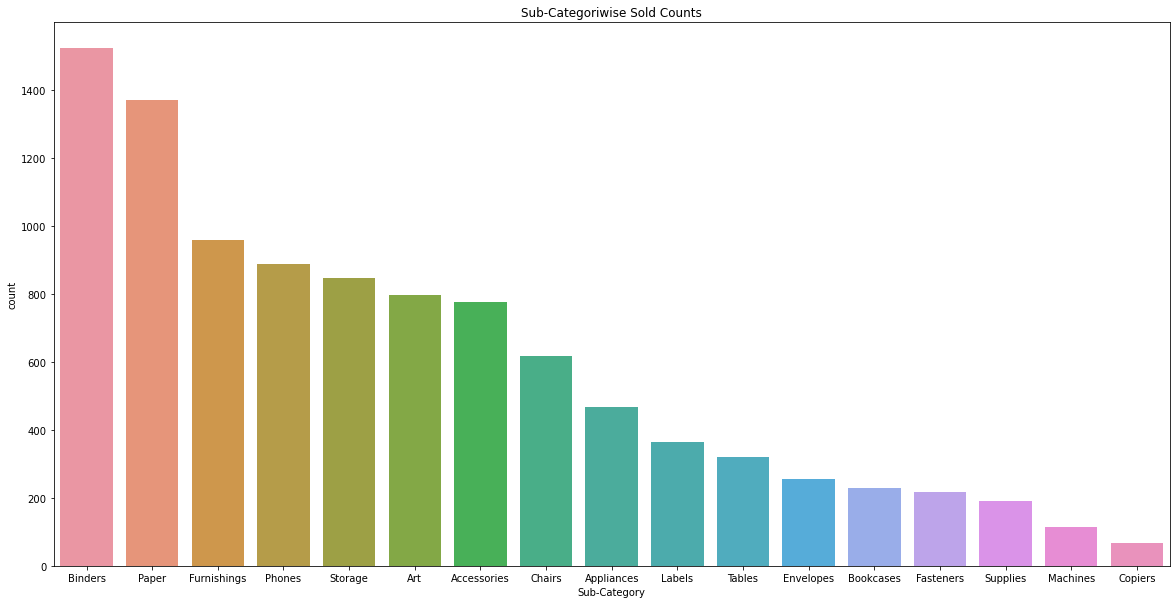

In [89]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Sub-Category'],orient='h', order=(retaildata['Sub-Category'].value_counts()).index)
plt.title('Sub-Categoriwise Sold Counts')
plt.show

In [91]:
#conclusion:By looking at above graph we can say 80% of orders are coming from 7 to 8 Cities only

In [92]:
##State-wise Performance of Orders Counts

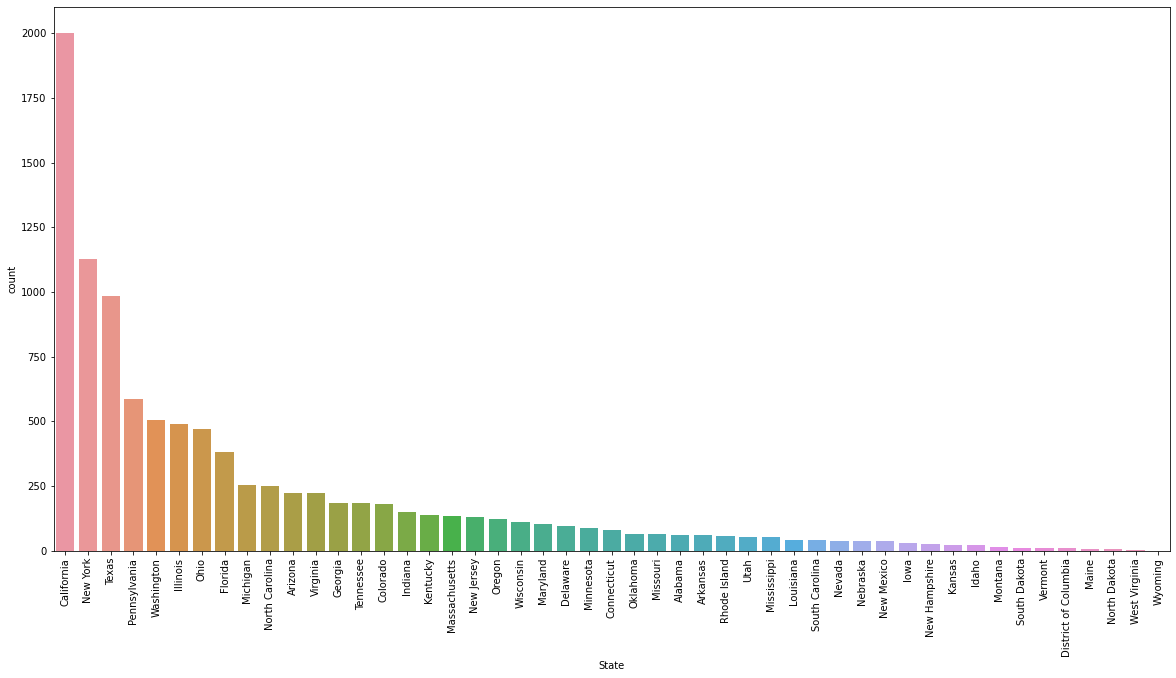

In [95]:
plt.figure(figsize=(20,10))
sns.countplot(x=retaildata['State'],order=(retaildata['State'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()
                            

In [96]:
#conclusion: By looking at above graph we can say 80% of orders are coming from 7 states only


In [97]:
#Regionwise Total sales and profit performance


In [98]:
y2 = retaildata.groupby(['Region'])['Sales'].sum()
y2

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [99]:
y2prof = retaildata.groupby(['Region'])['Profit'].sum()
y2prof

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [100]:
#Regionwise Average Sales


In [101]:
y2 = retaildata.groupby(['Region']).agg({'Sales':np.average})
y2 = y2.iloc[:,-1]
y2

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

In [105]:
#sub-categoriwise average sales

In [106]:
y4 = retaildata.groupby(['Sub-Category']).agg({'Sales':np.average})
y4 = y4.iloc[:,-1]
y4

Sub-Category
Accessories     215.974604
Appliances      230.755710
Art              34.068834
Binders         133.560560
Bookcases       503.859633
Chairs          532.332420
Copiers        2198.941618
Envelopes        64.867724
Fasteners        13.936774
Furnishings      95.825668
Labels           34.303055
Machines       1645.553313
Paper            57.284092
Phones          371.211534
Storage         264.590553
Supplies        245.650200
Tables          648.794771
Name: Sales, dtype: float64

In [ ]:
Thank you 
The Spark Foundation 
Completed By Vijay Nandeshwar